In [1]:
!git clone -l -s git://github.com/ApoorvaKrisna/Mini-Project cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 89, done.
remote: Total 89 (delta 0), reused 0 (delta 0), pack-reused 89
Receiving objects: 100% (89/89), 301.58 KiB | 8.87 MiB/s, done.
Resolving deltas: 100% (77/77), done.
/content/cloned-repo
'Indian Fruits Dataset'


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread


In [3]:
target = [] 
images = [] # Matrix Format
flat_data = [] 
DATADIR = '/content/cloned-repo/Indian Fruits Dataset'

CATEGORIES = ['MANGO','ORANGE','TOMATO']

for i in CATEGORIES:
  class_target = CATEGORIES.index(i) # Label Encoded the Target value
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) # Skimage normalizes the value
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)
    #print(img_resized.shape)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [4]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.0,1.000000,0.980525,1.0,1.000000,0.980791,1.0,0.999346,0.983017,1.0,0.996732,0.990329,1.0,0.996078,0.996078,1.0,0.995425,1.0,1.0,0.99281,1.0,1.0,0.994118,1.000000,1.0,0.996078,1.000000,1.0,0.996078,1.000000,0.998039,0.998039,1.000000,0.994251,1.0,1.000000,0.986939,1.0,1.000000,0.984712,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,1.0,0.996732,1.000000,1.0,0.998039,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.00000,1.0,1.0,1.000000,0.996078,1.0,1.000000,0.992157,1.0,1.000000,0.992157,1.000000,1.000000,0.992157,1.000000,1.0,0.992157,1.000000,1.0,0.992157,1.000000,...,1.000000,1.000000,0.990850,1.000000,1.000000,0.985621,1.000000,0.998039,0.982353,1.000000,0.996078,0.979739,1.000000,0.996078,0.977124,0.998366,0.994444,0.974837,0.997277,0.994009,0.977669,0.999455,0.998802,0.995534,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.00000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.00000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,1.0,1.000000,0.980525,1.0,1.000000,0.980791,1.0,0.999346,0.983017,1.0,0.996732,0.990329,1.0,0.996078,0.996078,1.0,0.995425,1.0,1.0,0.99281,1.0,1.0,0.994118,1.000000,1.0,0.996078,1.000000,1.0,0.996078,1.000000,0.998039,0.998039,1.000000,0.994251,1.0,1.000000,0.986939,1.0,1.000000,0.984712,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.

<BarContainer object of 3 artists>

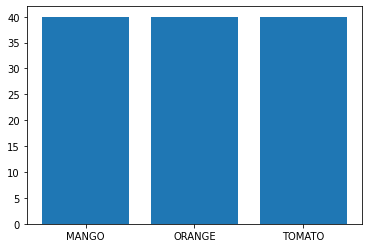

In [5]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state=10, stratify = target)
print(x_train.shape)
print(x_test.shape)

(84, 67500)
(36, 67500)


In [7]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([28, 28, 28]))

In [8]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([12, 12, 12]))

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc = svm.SVC(probability = True)
parameters = [
              {'C': [0.1,1,10,100,1000], 'kernel':['linear']},
              {'C': [0.1,1,10,100,1000], 'gamma': [0.001, 0.0001], 'kernel':['rbf']}
]
cv = GridSearchCV(svc,parameters,cv =5)
cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
y_pred = cv.predict(x_test)
y_pred

array([1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0,
       0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2])

In [11]:
y_test

array([1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0,
       0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2])

In [12]:
# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 12]])

In [13]:
accuracy_score(y_pred,y_test)

1.0

In [14]:
# Imbalanced Dataset
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [15]:
import pickle
pickle.dump(cv, open('img_model.p', 'wb'))

In [16]:
model = pickle.load(open('img_model.p', 'rb'))

Enter your URL https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Mango%20test/ALPHANOSE_TEST_012.jpg
(100, 100, 3)
 PREDITED OUTPUT: MANGO


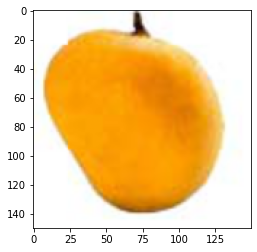

In [17]:
#Testing a brand new image
flat_data = []
url = input('Enter your URL ')
img = imread(url)
img_resized = resize(img, (150, 150, 3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDITED OUTPUT: {y_out}')

# Test image links
# 1. Mangoes
#   https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Mango%20test/ALPHANOSE_TEST_006.jpg
#   https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Mango%20test/ALPHANOSE_TEST_009.jpg
#   https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Mango%20test/ALPHANOSE_TEST_012.jpg
# 2. Oranges
#   https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Orange%20test/SWEET_TEST_015.JPG
#   https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Orange%20test/SWEET_TEST_019.JPG
#   https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Orange%20test/SWEET_TEST_043.JPG
# 3. Tomatoes
#   https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Tomato%20test/TOMATO1_11_003.jpg
#   https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Tomato%20test/TOMATO1_11_014.jpg
#   https://github.com/ApoorvaKrisna/Mini-Project/raw/main/Indian%20Fruits%20Dataset/Tomato%20test/TOMATO1_11_030.jpg